In [47]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import scipy
import cv2 as cv

In [48]:
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('nepali_characters/*/*/*.jpg'):
    # use the filename to set the correct label
    label = int(image_file_name[-14:-11])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = cv.imread(image_file_name, 0)  #Read an image from a file as an array
    (thresh, image_array) = cv.threshold(img_array, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    # reshape from 28x28 to list of 784 values, invert values
 #   img_data  = (255.0 - img_array.reshape(784))/255.0
    
    # then scale data to range from 0.01 to 1.0
#     img_data = (img_data / 255.0 * 0.99) + 0.01
#     print(np.min(img_data))
#     print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,image_array)
    our_own_dataset.append(record)

loading ...  nepali_characters/02_vowels/013/004_09.jpg
loading ...  nepali_characters/02_vowels/013/016_04.jpg
loading ...  nepali_characters/02_vowels/013/023_01.jpg
loading ...  nepali_characters/02_vowels/013/045_02.jpg
loading ...  nepali_characters/02_vowels/013/044_02.jpg
loading ...  nepali_characters/02_vowels/013/019_02.jpg
loading ...  nepali_characters/02_vowels/013/004_10.jpg
loading ...  nepali_characters/02_vowels/013/030_02.jpg
loading ...  nepali_characters/02_vowels/013/013_03.jpg
loading ...  nepali_characters/02_vowels/013/029_01.jpg
loading ...  nepali_characters/02_vowels/013/001_22.jpg
loading ...  nepali_characters/02_vowels/013/001_03.jpg
loading ...  nepali_characters/02_vowels/013/017_02.jpg
loading ...  nepali_characters/02_vowels/013/018_02.jpg
loading ...  nepali_characters/02_vowels/013/008_03.jpg
loading ...  nepali_characters/02_vowels/013/013_06.jpg
loading ...  nepali_characters/02_vowels/013/019_06.jpg
loading ...  nepali_characters/02_vowels/013/019

In [49]:
data = np.array(our_own_dataset)
np.random.shuffle(data)
xx = pd.DataFrame(data)

In [50]:
xx.tail()

,0,1,2,3,4,5,6,7,8,9,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
12907,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12908,42,255,255,255,255,255,255,255,255,255,...,0,0,255,255,255,255,255,255,255,255
12909,41,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12910,17,0,0,0,255,255,255,255,255,255,...,0,0,255,255,255,255,255,255,255,255
12911,24,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [51]:
x = np.array(xx)
X = x[:,1:]
y = x[:,0]

In [52]:
x.shape

(12912, 1297)

In [53]:
# X = data_pd.iloc[:,1:]
# y = data_pd.iloc[:,0:1].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [54]:
X_test.shape

(2583, 1296)

In [55]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (10329, 1296)
y_train shape (10329,)
X_test shape (2583, 1296)
y_test shape (2583,)
Train matrix shape (10329, 1296)
Test matrix shape (2583, 1296)


In [56]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)


In [75]:
# img_shape = (28,28,1)
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=img_shape))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# BatchNormalization(axis=-1)
# model.add(Conv2D(64,(3, 3)))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# # Fully connected layer

# BatchNormalization()
# model.add(Dense(512))
# model.add(Activation('relu'))
# BatchNormalization()
# model.add(Dropout(0.2))
# model.add(Dense(58))

# model.add(Activation('softmax'))

model = Sequential()
model.add(Dense(512, input_shape=(1296,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(58))
model.add(Activation('softmax'))

In [76]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 10329 samples, validate on 2583 samples
Epoch 1/20
 - 2s - loss: 4.0326 - acc: 0.0389 - val_loss: 3.6993 - val_acc: 0.1007
Epoch 2/20
 - 1s - loss: 3.3267 - acc: 0.1506 - val_loss: 2.6968 - val_acc: 0.2927
Epoch 3/20
 - 1s - loss: 2.5892 - acc: 0.2792 - val_loss: 2.0521 - val_acc: 0.4599
Epoch 4/20
 - 1s - loss: 2.1472 - acc: 0.3856 - val_loss: 1.7319 - val_acc: 0.5168
Epoch 5/20
 - 1s - loss: 1.8678 - acc: 0.4605 - val_loss: 1.4709 - val_acc: 0.5923
Epoch 6/20
 - 1s - loss: 1.6735 - acc: 0.5113 - val_loss: 1.3904 - val_acc: 0.6012
Epoch 7/20
 - 1s - loss: 1.5898 - acc: 0.5349 - val_loss: 1.3362 - val_acc: 0.6214
Epoch 8/20
 - 1s - loss: 1.4838 - acc: 0.5584 - val_loss: 1.2660 - val_acc: 0.6345
Epoch 9/20
 - 1s - loss: 1.3756 - acc: 0.5898 - val_loss: 1.1577 - val_acc: 0.6643
Epoch 10/20
 - 1s - loss: 1.3153 - acc: 0.6097 - val_loss: 1.1225 - val_acc: 0.6775
Epoch 11/20
 - 1s - loss: 1.2472 - acc: 0.6273 - val_loss: 1.1338 - val_acc: 0.6713
Epoch 12/20
 - 1s - loss: 1.1849 - a

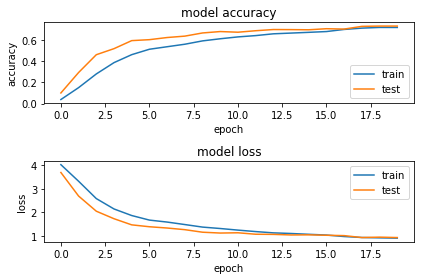

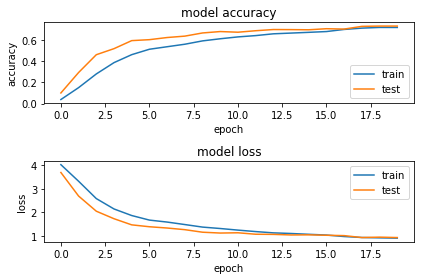

In [77]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/home/uttam/PycharmProjects/ML"
model_name = 'model_test.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [84]:
prediction = model.predict_classes(X_test[500:501])

In [85]:
prediction

array([48])

In [86]:
scipy.misc.imsave("predict1.png",X_test[500,:].reshape(-1,36))

/home/uttam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
